In [13]:
# Importing Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 1. Data Collection

#### Find the information about dataset from the below Link
- https://www.kaggle.com/datasets/shree1992/housedata

In [14]:
# Read the CSV as DataFrame
house_price_df = pd.read_csv('https://github.com/N_Logeshwaran/Public_Datasets/raw/main/House_Price.csv')

In [15]:
house_price_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### 2. Data Inspection

In [16]:
print(f'Number of rows in house_price_df: {house_price_df.shape[0]}')
print(f'Number of cols in house_price_df: {house_price_df.shape[1]}')

Number of rows in house_price_df: 4600
Number of cols in house_price_df: 18


In [17]:
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

### 3. Checking Null values

In [18]:
missing_details_df = pd.DataFrame({
    'Missing Count': house_price_df.isnull().sum(),
    'Missing Persentage': (house_price_df.isnull().sum() / len(house_price_df)) * 100
})
missing_details_df

,Missing Count,Missing Persentage
date,0,0.0
price,0,0.0
bedrooms,0,0.0
bathrooms,0,0.0
sqft_living,0,0.0
sqft_lot,0,0.0
floors,0,0.0
waterfront,0,0.0
view,0,0.0
condition,0,0.0


### 4. Checking Duplicates 

In [19]:
print(f'Number of Duplicates in house_price_df: {house_price_df.duplicated().sum()}')

Number of Duplicates in house_price_df: 0


### 5. Checking Outliers

In [20]:
# Fetch the numaric columns from the dataframe
num_cols = house_price_df.select_dtypes(include=['number']).columns.tolist()
print(f'Numerical columns from the dataframe: {num_cols}')

Numerical columns from the dataframe: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']


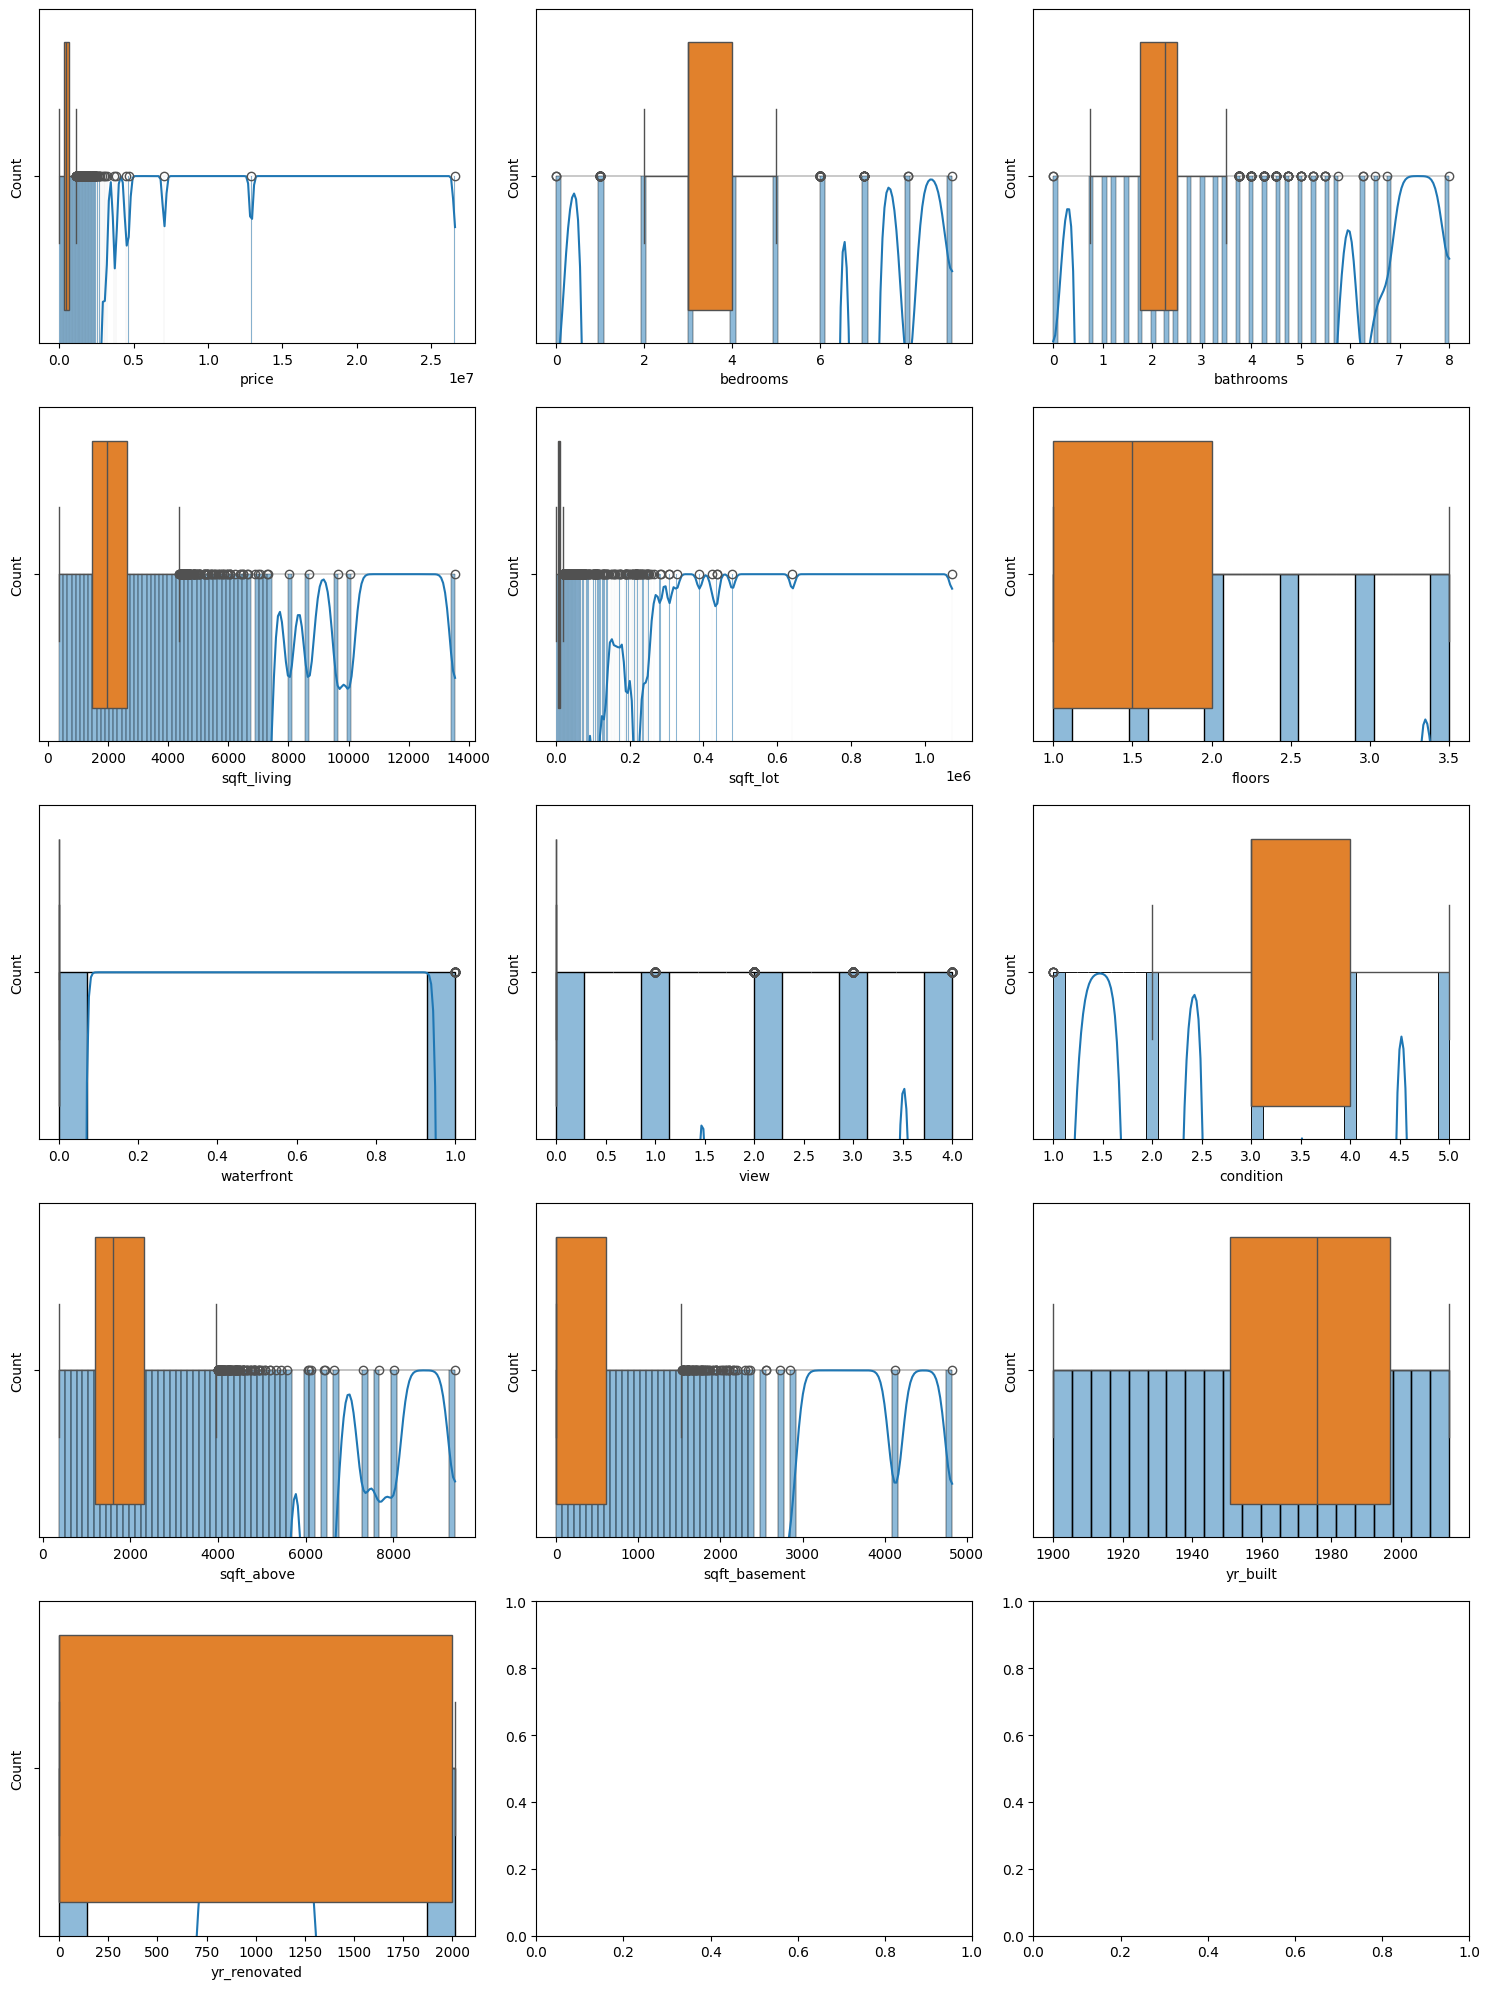

In [21]:
# Visualize the Distributionwith outliers
cols = 3
rows = (len(num_cols) + cols -1) // cols

fig, axis = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
axis = axis.flatten()

for i,col in enumerate(num_cols):
    sns.histplot(house_price_df[col], kde=True, ax=axis[i])
    sns.boxplot(x=house_price_df[col], ax=axis[i])

plt.tight_layout()
plt.show()

### 6. Feature Engineering

In [22]:
# Create new columns
current_year = 2025
house_price_df['age_house'] = current_year - house_price_df['yr_built']
house_price_df['is_basement'] = house_price_df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
house_price_df['is_renovated'] = house_price_df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
house_price_df['Address'] = house_price_df['street'] + ',' + house_price_df['city'] + ',' + house_price_df['statezip'] + ',' + house_price_df['country']
house_price_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,street,city,statezip,country,age_house,is_basement,is_renovated,Address
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,70,0,1,"18810 Densmore Ave N,Shoreline,WA 98133,USA"
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,1921,0,709 W Blaine St,Seattle,WA 98119,USA,104,1,0,"709 W Blaine St,Seattle,WA 98119,USA"
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,59,0,0,"26206-26214 143rd Ave SE,Kent,WA 98042,USA"
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,62,1,0,"857 170th Pl NE,Bellevue,WA 98008,USA"
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,49,1,1,"9105 170th Ave NE,Redmond,WA 98052,USA"


In [23]:
# Remove un-wanted columns
house_price_df.drop(['street', 'city', 'statezip', 'country', 'date', 'sqft_basement', 'yr_built', 'yr_renovated'], axis=1, inplace=True)

In [24]:
# After Removing un-wanted columns
house_price_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,age_house,is_basement,is_renovated,Address
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,70,0,1,"18810 Densmore Ave N,Shoreline,WA 98133,USA"
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,104,1,0,"709 W Blaine St,Seattle,WA 98119,USA"
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,59,0,0,"26206-26214 143rd Ave SE,Kent,WA 98042,USA"
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,62,1,0,"857 170th Pl NE,Bellevue,WA 98008,USA"
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,49,1,1,"9105 170th Ave NE,Redmond,WA 98052,USA"


### 7. Convert any DType to Numaric DType

In [25]:
encoder = LabelEncoder()

encoder.fit(house_price_df.Address.unique())
house_price_df.Address = encoder.transform(house_price_df.Address)

In [26]:
# Gather encoded Lbel and values from Address
address_label_value = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

In [27]:
# DataFrame after lable encoder
house_price_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,age_house,is_basement,is_renovated,Address
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,70,0,1,1522
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,104,1,0,3899
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,59,0,0,2291
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,62,1,0,4263
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,49,1,1,4352


### 8. Checking Co-Relation

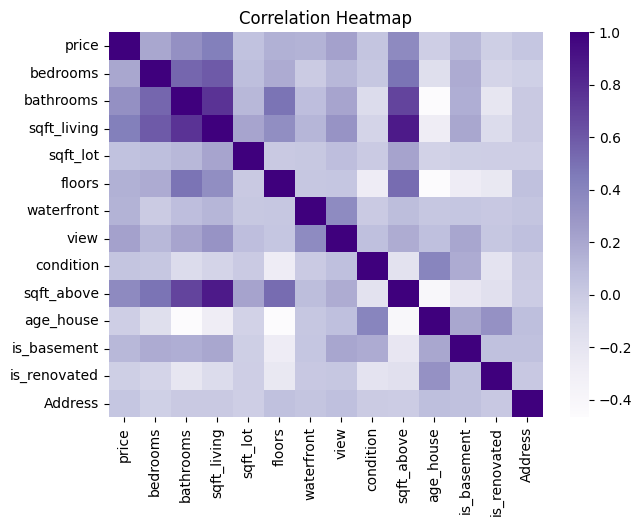

In [28]:
fig = plt.figure(figsize=(7, 5))
sns.heatmap(house_price_df.corr(), cmap='Purples', annot=False, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### 9. Split single Table into train and test Data

In [29]:
# Spliting the Table as Feature and Outcome
feature = house_price_df.iloc[:, 1:]
outcome = house_price_df.iloc[:, :1]

In [30]:
x_train, x_test, y_train, y_test = train_test_split(feature, outcome, test_size=0.2, random_state=42)

### 10. Standerdize the features

In [31]:
# Standardize
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### 11. Create the Model

In [32]:
regression_model = LinearRegression()

### 12. Train the model

In [33]:
regression_model.fit(x_train_scaled, y_train)

LinearRegression()

### 13. Test The Model with training data to check training accuracy

In [34]:
# predict the outcome using training data 
y_pred_train = regression_model.predict(x_train_scaled)

In [35]:
# calculate the metric 
evaluation_data = {}
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred_train)

In [36]:
# check the training accuracy
evaluation_data['Train Metrics'] = dict(zip(['MAE', 'MSE', 'RMSE', 'R2_SCORE'], [mae, mse, rmse, r2]))
train_evaluation_df = pd.DataFrame(evaluation_data).style.format("{:.2f}")
train_evaluation_df

,Train Metrics
MAE,158544.93
MSE,64652974762.10
RMSE,254269.49
R2_SCORE,0.54


### 14. Test The Model with testing data to check training accuracy

In [37]:
# predict the outcome using testing data 
y_pred_test = regression_model.predict(x_test_scaled)

In [38]:
# calculate the metric 
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

In [39]:
# check the testing accuracy
evaluation_data['Test Metrics'] = dict(zip(['MAE', 'MSE', 'RMSE', 'R2_SCORE'], [mae, mse, rmse, r2]))
train_test_evaluation_df = pd.DataFrame(evaluation_data).style.format("{:.2f}")
train_test_evaluation_df

,Train Metrics,Test Metrics
MAE,158544.93,210376.85
MSE,64652974762.10,987244312695.70
RMSE,254269.49,993601.69
R2_SCORE,0.54,0.03


In [40]:
print(f'Weights: {regression_model.coef_}')
print(f'Intersept: {regression_model.intercept_}')

Weights: [[-57793.46640822  27487.63966414 248854.95045696 -18079.38430033
   36197.92839523  32838.1509422   34342.72778739  20308.87532828
   22254.28517456  74961.961773     8312.55150952   8261.26585064
    9553.31527228]]
Intersept: [544848.26883255]
